<a href="https://colab.research.google.com/github/yahyasungur/nlp_dl_ml_projects/blob/master/Spam_Detection_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data Preprocessing

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ['labels','data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['b_labels'] = df['labels'].map({'ham':0 , 'spam':1})
y = df['b_labels'].values

In [11]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size = 0.33)

In [13]:
#Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)

In [14]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [15]:
x_train[3]

'U dun say so early hor... U c already then say...'

In [16]:
print(sequences_train[3])

[3, 17, 59, 3411, 23, 3, 22, 3412]


In [17]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens :',V)

Total number of unique tokens : 7209


In [18]:
#pas sequences (to get N X T Matrix)

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)
# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [19]:
data_train[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [20]:
len(data_train[3]) , len(data_train[300]) , len(data_train[45])

(189, 189, 189)

In [21]:
# set the value of T to get seq. length
T = data_train.shape[1]

In [22]:
# pas the test set
data_test = pad_sequences(sequences_test, maxlen=T)
# maxlen = T for truncating longer sentences in test set

In [23]:
data_test.shape

(1839, 189)

#2) Building the Model

In [25]:
 # Word vector size
 D = 20

 # Hidden state dimensionality
 M = 15

 # Input layer
 i = Input(shape=(T,))

 # Embeding layer
 x = Embedding(V + 1, D)(i)

 # LSTM layer
 x = LSTM(M,return_sequences=True)(x)
 x = GlobalMaxPooling1D()(x)

 # Dense layer
 x = Dense(1, activation='sigmoid')(x) 
 # it is a binary classification, so activation func. = 'sigmoid'

 model = Model(i,x)

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Train
r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 13s 88ms/step - loss: 0.4501 - accuracy: 0.8610 - val_loss: 0.3414 - val_accuracy: 0.8760
Epoch 2/10
117/117 [==============================] - 10s 84ms/step - loss: 0.3228 - accuracy: 0.8610 - val_loss: 0.2806 - val_accuracy: 0.8760
Epoch 3/10
117/117 [==============================] - 10s 86ms/step - loss: 0.2250 - accuracy: 0.8813 - val_loss: 0.1719 - val_accuracy: 0.9592
Epoch 4/10
117/117 [==============================] - 10s 85ms/step - loss: 0.1385 - accuracy: 0.9909 - val_loss: 0.1196 - val_accuracy: 0.9859
Epoch 5/10
117/117 [==============================] - 10s 87ms/step - loss: 0.0864 - accuracy: 0.9960 - val_loss: 0.0884 - val_accuracy: 0.9864
Epoch 6/10
117/117 [==============================] - 10s 86ms/step - loss: 0.0554 - accuracy: 0.9984 - val_loss: 0.0696 - val_accuracy: 0.9886
Epoch 7/10
117/117 [==============================] - 10s 87ms/step - loss: 0.0369 - accuracy: 0.9992 - val_loss: 0.0631 - val_accuracy:

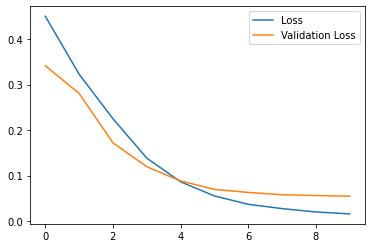

In [28]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

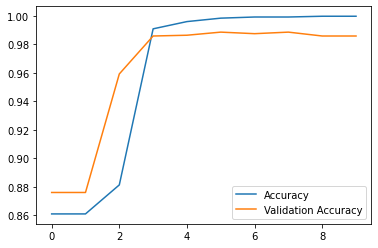

In [29]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## The effect of the change taking place in Word vector size

In [30]:
 # Word vector size
 D = 80

 # Hidden state dimensionality
 M = 15

 # Input layer
 i = Input(shape=(T,))

 # Embeding layer
 x = Embedding(V + 1, D)(i)

 # LSTM layer
 x = LSTM(M,return_sequences=True)(x)
 x = GlobalMaxPooling1D()(x)

 # Dense layer
 x = Dense(1, activation='sigmoid')(x) 
 # it is a binary classification, so activation func. = 'sigmoid'

 model = Model(i,x)

 # Compile the model
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

 # Train
 r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 15s 109ms/step - loss: 0.4116 - accuracy: 0.8607 - val_loss: 0.2523 - val_accuracy: 0.8760
Epoch 2/10
117/117 [==============================] - 12s 104ms/step - loss: 0.1486 - accuracy: 0.9512 - val_loss: 0.0928 - val_accuracy: 0.9810
Epoch 3/10
117/117 [==============================] - 12s 101ms/step - loss: 0.0533 - accuracy: 0.9938 - val_loss: 0.0594 - val_accuracy: 0.9864
Epoch 4/10
117/117 [==============================] - 12s 101ms/step - loss: 0.0257 - accuracy: 0.9981 - val_loss: 0.0516 - val_accuracy: 0.9875
Epoch 5/10
117/117 [==============================] - 12s 101ms/step - loss: 0.0144 - accuracy: 0.9995 - val_loss: 0.0505 - val_accuracy: 0.9859
Epoch 6/10
117/117 [==============================] - 12s 100ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.0499 - val_accuracy: 0.9853
Epoch 7/10
117/117 [==============================] - 12s 99ms/step - loss: 0.0069 - accuracy: 0.9997 - val_loss: 0.0507 - val_acc

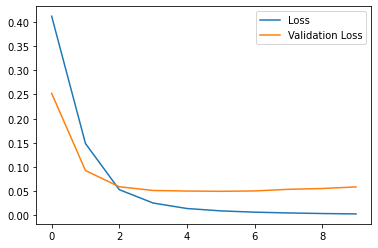

In [31]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

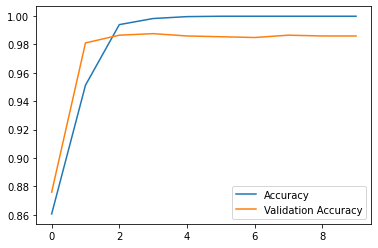

In [32]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

##Effect of change in hidden state dimensionality

In [33]:
 # Word vector size
 D = 20

 # Hidden state dimensionality
 M = 60

 # Input layer
 i = Input(shape=(T,))

 # Embeding layer
 x = Embedding(V + 1, D)(i)

 # LSTM layer
 x = LSTM(M,return_sequences=True)(x)
 x = GlobalMaxPooling1D()(x)

 # Dense layer
 x = Dense(1, activation='sigmoid')(x) 
 # it is a binary classification, so activation func. = 'sigmoid'

 model = Model(i,x)

 # Compile the model
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

 # Train
 r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 18s 136ms/step - loss: 0.4342 - accuracy: 0.8610 - val_loss: 0.3681 - val_accuracy: 0.8760
Epoch 2/10
117/117 [==============================] - 15s 130ms/step - loss: 0.3191 - accuracy: 0.8749 - val_loss: 0.1484 - val_accuracy: 0.9755
Epoch 3/10
117/117 [==============================] - 16s 135ms/step - loss: 0.0896 - accuracy: 0.9839 - val_loss: 0.0865 - val_accuracy: 0.9788
Epoch 4/10
117/117 [==============================] - 15s 132ms/step - loss: 0.0461 - accuracy: 0.9909 - val_loss: 0.0767 - val_accuracy: 0.9810
Epoch 5/10
117/117 [==============================] - 15s 130ms/step - loss: 0.0290 - accuracy: 0.9946 - val_loss: 0.1004 - val_accuracy: 0.9728
Epoch 6/10
117/117 [==============================] - 15s 131ms/step - loss: 0.0228 - accuracy: 0.9962 - val_loss: 0.0696 - val_accuracy: 0.9815
Epoch 7/10
117/117 [==============================] - 15s 130ms/step - loss: 0.0137 - accuracy: 0.9973 - val_loss: 0.0640 - val_ac

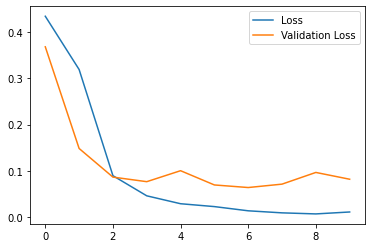

In [34]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

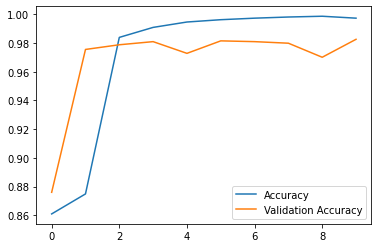

In [35]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()